In [2]:
!pip install opencv-python

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('teste.jpg')

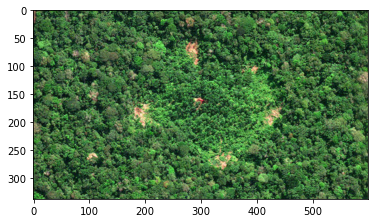

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [5]:
vectorized = image.reshape((-1,3))
vectorized = np.float32(vectorized)

In [ ]:
from sklearn.cluster import KMeans

#Método Elbow (ou Método do "Joelho"): Encontrando um valor ideal para o número de clusters
inicio = 2
fim = 10
inercia = []

for i in range(inicio, fim):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(vectorized)
    inercia.append(kmeans.inertia_)

#Cálculo da maior queda do "joelho"
diferencas = []
for j in range(2,len(inercia)):
    if j+1 != len(inercia):
        t = []
        m = inercia[j] - inercia[j+1]
        t.append(j+1)
        t.append(m)
        diferencas.append(t)
        
#Gráfico da variância em relação ao número de clusters
#Lembrando: maior a variância, maior a dispersão dos dados
plt.plot(range(inicio, fim), inercia)
plt.scatter(range(inicio, fim), inercia, c='red')
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('Nº Agrupamentos')
plt.show()

print(diferencas)

In [45]:
print(max(diferencas[0]))

139334912.0


In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
K = 10
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [12]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((image.shape))

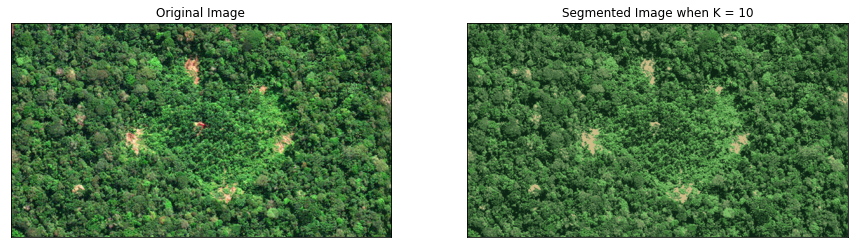

In [13]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()